**Load The Dataset from Local Directory**

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv




---


Load the Dataset in pandas Dataframe. We name the dataframe as 'df'

In [2]:
import pandas as pd

df = pd.read_csv("Restaurant_Reviews.tsv", sep = '\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1




---


Check Missing **values**

In [2]:
print(df.isnull().sum())

Review    0
Liked     0
dtype: int64


There is no missing values. If you have missing values in your dataset, simply run:
```
df.dropna(axis = 0, inplace = True)
```
There, 
axis = 0 indicates row. Rows withMissing values will be droped



---


**Exploratory Data Analysis (EDA)**

/home/alpha/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

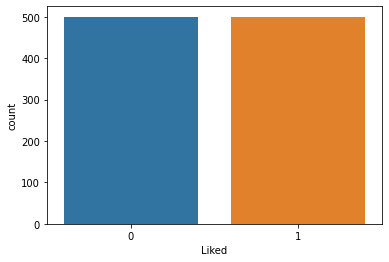

In [3]:
import seaborn as sns

sns.countplot("Liked", data = df)

The graph above shows we have approximately equal number of Positive(1) & Negative(0) sentiment in the dataframe



---


**Cleaning Reviews**

Dependencies:
*   nltk
*   re



In [3]:
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
stopwords.remove('not')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /home/alpha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/alpha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
cleaned_reviews = []
for i in range(len(df)):

    review = re.sub("[^a-zA-Z]"," ", df["Review"][i])
    review = review.lower()
    review = word_tokenize(review)
    stopwordless_review = [rev for rev in review if rev not in stopwords ]
    #Stemming : PorterStemmer
#     lemma_review = [ps.stem(re) for re in stopwordless_review]
    #Lemmatization: WordNetLemmatizer
    lemma_review = [lemmatizer.lemmatize(re) for re in stopwordless_review]
    cleaned_review = " ".join(lemma_review)
    cleaned_reviews.append(cleaned_review)

# print(df["Review"][999])
# print(review)
# print(stopwordless_review)
# print(base_words_review)
# print(lemma_words_review)



[nltk_data] Downloading package punkt to /home/alpha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# cleaned_reviews

**Creating a BOW model & TF-IDF model**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

from gensim.models import Word2Vec
w_model = Word2Vec(min_count=1, window=10)

X = w_model.build_vocab(cleaned_r.to_array())

# X = tf.fit_transform(cleaned_reviews).toarray()

y = df['Liked']
len(X[0])

NameError: name 'sentences' is not defined

Dumping

In [ ]:
import pickle
pickle.dump(cv,open('cv.pickle', 'wb'))

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =train_test_split(X,y,test_size = 0.2, random_state = 100)
X_train.shape, Y_test.shape

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [105]:
SVCmodel = SVC().fit(X_train, Y_train)
NBmodel = MultinomialNB().fit(X_train, Y_train)
LRmodel = LogisticRegression().fit(X_train, Y_train)
DTmodel = DecisionTreeClassifier().fit(X_train, Y_train)
RFmodel = RandomForestClassifier().fit(X_train, Y_train)
# model = GaussianNB().fit(X_train, Y_train)
KNNmodel = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
print(f"KNN: {KNNmodel.score(X_test,Y_test)*100}, SVC:{SVCmodel.score(X_test,Y_test)*100}, Naive Bayes: {NBmodel.score(X_test,Y_test)*100}, Logistic Regression: {LRmodel.score(X_test,Y_test)*100}, Decission Tree: {DTmodel.score(X_test,Y_test)*100}, Random Forest: {RFmodel.score(X_test,Y_test)*100 :.2f} ")


KNN: 77.5, SVC:82.5, Naive Bayes: 80.0, Logistic Regression: 84.0, Decission Tree: 71.0, Random Forest: 76.00 


In [33]:
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

Accurecy = accuracy_score(Y_test,Y_pred)
Accurecy

0.775

In [ ]:
pickle.dump(model, open("review.pkl","wb"))

In [ ]:
loaded_model = pickle.load(open("review.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,Y_test)

In [ ]:
# nltk.download("stopwords")
# from nltk.corpus import stopwords
# all_stopwords = stopwords.words('english')
# all_stopwords.remove('not')

# from nltk.stem import PorterStemmer
# pe = PorterStemmer()

# def new_review(new_review):
#     new_review = new_review
#     new_review = re.sub('[^a-zA-Z]', ' ', new_review)
#     new_review = new_review.lower()
#     new_review = new_review.split()
#     # pe = PorterStemmer()
#     # all_stopwords = stopwords.words('english')
#     # all_stopwords.remove('not')
#     new_review = [pe.stem(word) for word in new_review if not word in set(all_stopwords)]
#     new_review = ' '.join(new_review)
#     new_corpus = [new_review]
#     new_X_test = cv.transform(new_corpus).toarray()
#     print(new_X_test.shape)
#     new_y_pred = loaded_model.predict(new_X_test)
#     return new_y_pred

# new_review = new_review(str(input("Enter new review...")))
# if new_review[0]==1:
#     print("Positive")
# else :
#     print("Negative")